In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

SEED=9

In [3]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df = df.drop("Id",axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
y=df.iloc[:,-1].values
df=df.iloc[:, :-1]

In [10]:
df_columns = df.columns.to_list()

In [11]:
num_columns = df.select_dtypes("number").columns.to_list()
num_df = df.select_dtypes("number")

In [12]:
correlation_matrix = num_df.corr()
threshold = 0.75

high_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
print(high_correlations)

               MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass            1.0          NaN      NaN          NaN          NaN   
LotFrontage           NaN          1.0      NaN          NaN          NaN   
LotArea               NaN          NaN      1.0          NaN          NaN   
OverallQual           NaN          NaN      NaN          1.0          NaN   
OverallCond           NaN          NaN      NaN          NaN          1.0   
YearBuilt             NaN          NaN      NaN          NaN          NaN   
YearRemodAdd          NaN          NaN      NaN          NaN          NaN   
MasVnrArea            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2            NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF             NaN          NaN      NaN          NaN          NaN   
TotalBsmtSF           NaN          NaN      NaN          NaN          NaN   

In [13]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

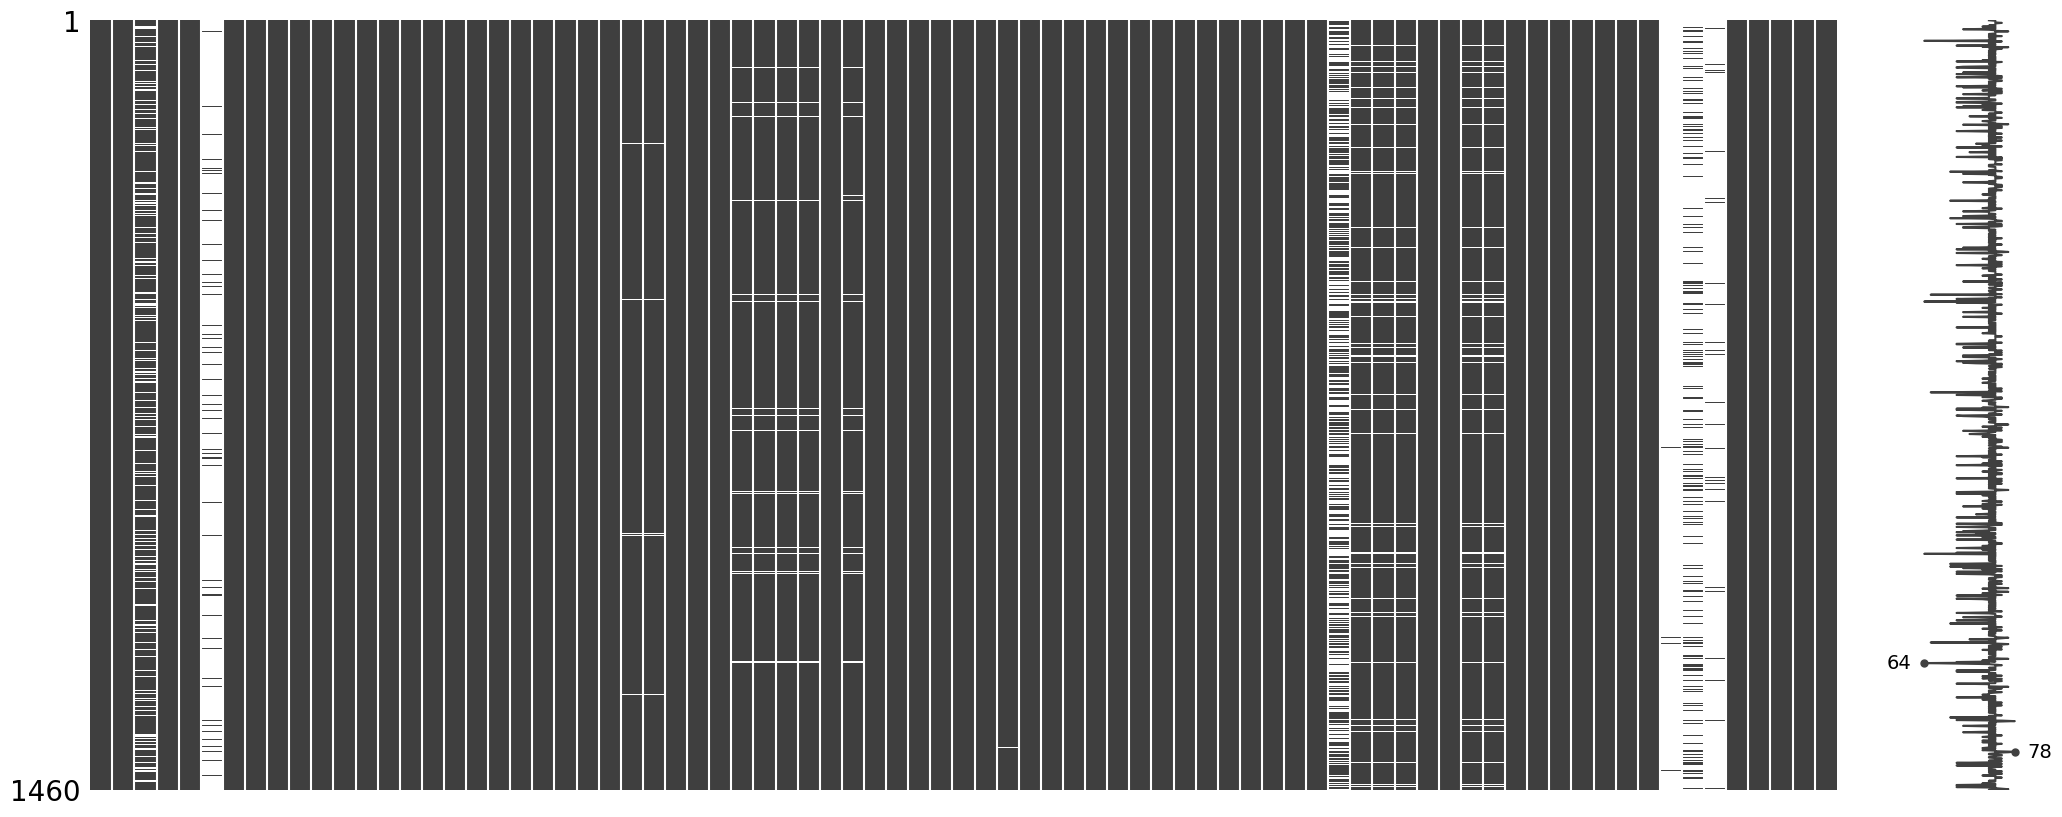

In [14]:
# Visualize missingness
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [15]:
df[num_columns].isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [16]:
df = df.fillna({'LotFrontage': 0})
df = df.fillna({'GarageYrBlt': 0})

In [17]:
'''
def remove_outliers(df, columns, factor=3.0):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from numeric columns
df = remove_outliers(df, num_columns)
'''

'\ndef remove_outliers(df, columns, factor=3.0):\n    for column in columns:\n        Q1 = df[column].quantile(0.25)\n        Q3 = df[column].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - factor * IQR\n        upper_bound = Q3 + factor * IQR\n        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df\n\n# Apply the function to remove outliers from numeric columns\ndf = remove_outliers(df, num_columns)\n'

In [18]:
cat_columns = df.select_dtypes("object").columns.to_list()
df[cat_columns].isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [19]:
df.dropna(subset=['Electrical'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [20]:
df.isna().sum().sum()

6625

In [21]:
for column in cat_columns:
        df = df.fillna({column:0})

In [22]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with the strategy (mean or median)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' as well

# Fit and transform the selected columns
df[num_columns] = imputer.fit_transform(df[num_columns])

In [23]:
for column in cat_columns:
    print(f'the column {column} has {df[column].nunique()} unique values')

the column MSZoning has 5 unique values
the column Street has 2 unique values
the column Alley has 3 unique values
the column LotShape has 4 unique values
the column LandContour has 4 unique values
the column Utilities has 2 unique values
the column LotConfig has 5 unique values
the column LandSlope has 3 unique values
the column Neighborhood has 25 unique values
the column Condition1 has 9 unique values
the column Condition2 has 8 unique values
the column BldgType has 5 unique values
the column HouseStyle has 8 unique values
the column RoofStyle has 6 unique values
the column RoofMatl has 8 unique values
the column Exterior1st has 15 unique values
the column Exterior2nd has 16 unique values
the column MasVnrType has 5 unique values
the column ExterQual has 4 unique values
the column ExterCond has 5 unique values
the column Foundation has 6 unique values
the column BsmtQual has 5 unique values
the column BsmtCond has 5 unique values
the column BsmtExposure has 5 unique values
the colum

In [24]:
df['Street'] = df['Street'].apply(lambda x:1 if x=='Pave' else 0 )
df['CentralAir'] = df['CentralAir'].apply(lambda x:1 if x=='Y' else 0 )

In [25]:
mapping_1 = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,0:0}
mapping_2 = {'GLQ': 6,'ALQ':5 , 'BLQ':4 , 'Rec':3, 'LwQ':2 , 'Unf':1,0:0}
mapping_3 = {'GdPrv':4 , 'MnPrv':3,'GdWo': 2,'MnWw':1,0:0}

In [26]:
df['ExterQual'] = df['ExterQual'].map(mapping_1)
df['ExterCond'] = df['ExterCond'].map(mapping_1)
df['BsmtQual'] = df['BsmtQual'].map(mapping_1)
df['BsmtCond'] = df['BsmtCond'].map(mapping_1)
df['BsmtFinType1'] = df['BsmtFinType1'].map(mapping_2)
df['BsmtFinType2'] = df['BsmtFinType2'].map(mapping_2)
df['HeatingQC'] = df['HeatingQC'].map(mapping_1)
df['KitchenQual'] = df['KitchenQual'].map(mapping_1)
df['FireplaceQu'] = df['FireplaceQu'].map(mapping_1)
df['GarageQual'] = df['GarageQual'].map(mapping_1)
df['GarageCond'] = df['GarageCond'].map(mapping_1)
df['PoolQC'] = df['PoolQC'].map(mapping_1)
df['Fence'] = df['Fence'].map(mapping_3)

In [27]:
df = df.drop("Utilities",axis=1)

In [28]:
onehot_col = ['MSZoning','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',\
              'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure',\
              'Heating','Electrical','Functional','GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']

In [29]:
df = pd.get_dummies(df,columns=onehot_col,drop_first=True)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit and transform the selected columns
df[num_columns] = sc.fit_transform(df[num_columns])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df,y,test_size=0.2,random_state=SEED)

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

params = {"booster":"gblinear","objective":"reg:squarederror",'learning_rate': 0.01,'alpha':0.002,'seed':9}

xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=100)
preds = xg_reg.predict(DM_test)

In [56]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 35051.519356


In [57]:
df_dmatrix=xgb.DMatrix(data=df,label=y)

In [62]:
tuned_params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.05, 'max_depth': 5}

In [63]:
tuned_cv_results_rmse = xgb.cv(dtrain=df_dmatrix,params=tuned_params, nfold=4, num_boost_round=300, 
                               metrics="rmse",as_pandas=True, seed=123)

In [64]:
xg_reg = xgb.train(params = tuned_params, dtrain=df_dmatrix, num_boost_round=200)

In [65]:
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Tuned rmse: 27613.638404


In [40]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_id=test.Id
test_num_cols=test.select_dtypes('number')
test_cat_cols=test.select_dtypes('object')

In [41]:
test = test.drop("Utilities",axis=1)
test= test.drop('Id',axis=1)

In [42]:
test['Street'] = test['Street'].apply(lambda x:1 if x=='Pave' else 0 )
test['CentralAir'] = test['CentralAir'].apply(lambda x:1 if x=='Y' else 0 )

In [43]:
test['ExterQual'] = test['ExterQual'].map(mapping_1)
test['ExterCond'] = test['ExterCond'].map(mapping_1)
test['BsmtQual'] = test['BsmtQual'].map(mapping_1)
test['BsmtCond'] = test['BsmtCond'].map(mapping_1)
test['BsmtFinType1'] = test['BsmtFinType1'].map(mapping_2)
test['BsmtFinType2'] = test['BsmtFinType2'].map(mapping_2)
test['HeatingQC'] = test['HeatingQC'].map(mapping_1)
test['KitchenQual'] = test['KitchenQual'].map(mapping_1)
test['FireplaceQu'] = test['FireplaceQu'].map(mapping_1)
test['GarageQual'] = test['GarageQual'].map(mapping_1)
test['GarageCond'] = test['GarageCond'].map(mapping_1)
test['PoolQC'] = test['PoolQC'].map(mapping_1)
test['Fence'] = test['Fence'].map(mapping_3)

In [44]:
test = pd.get_dummies(test,columns=onehot_col,drop_first=True)

In [45]:
existing_columns = set(df.columns)
for column in existing_columns:
    if column not in test:
        test[column] = 0

In [46]:
test = test[df.columns]

In [47]:
test[num_columns] = sc.transform(test[num_columns])

In [48]:
test_Dmatrix=xgb.DMatrix(data=test)

In [49]:
predicted_prices = xg_reg.predict(test_Dmatrix)

In [50]:
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': predicted_prices})
my_submission.to_csv('/kaggle/working/submission.csv', index=False)
my_submission.head()

,Id,SalePrice
0,1461,126209.429688
1,1462,160061.531250
2,1463,186962.125000
3,1464,188987.593750
4,1465,199029.218750
